<a href="https://colab.research.google.com/github/marathe90/Predicting-the-effectiveness-of-bank-marketing-campaigns/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
import numpy as np
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler , SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading the data
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone project/P3/bank-full.csv",sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
bank=df.copy()
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
bank.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [ ]:
bank.shape

(45211, 17)

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
bank['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
bank['loan'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
bank['default'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
bank['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [ ]:
bank['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
bank['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

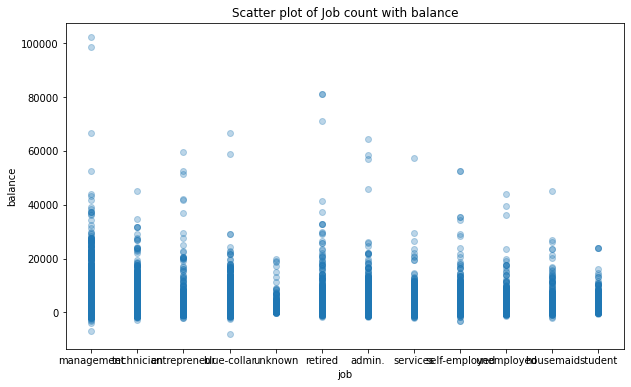

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(bank['job'], bank['balance'], alpha=0.3)
plt.title('Scatter plot of Job count with balance')
plt.xlabel('job')
plt.ylabel('balance')
plt.show()

# **Visualizing the data**

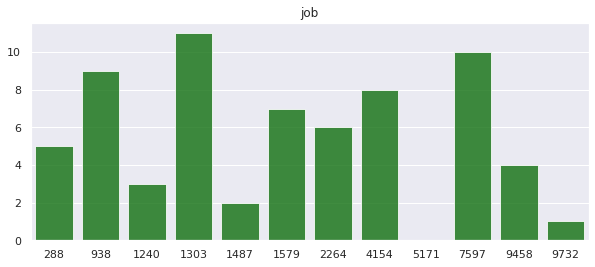

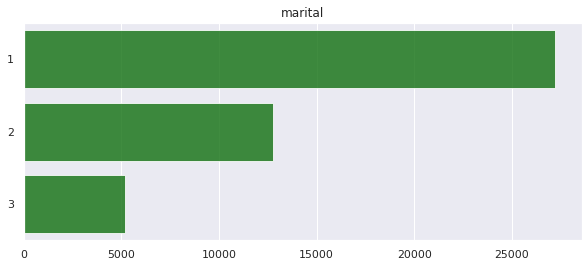

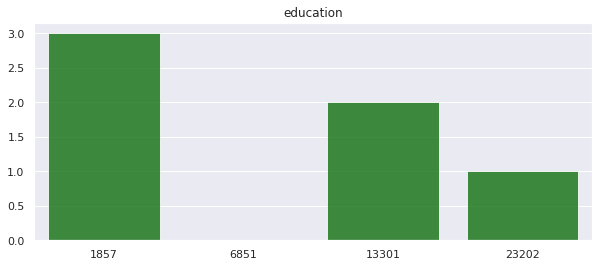

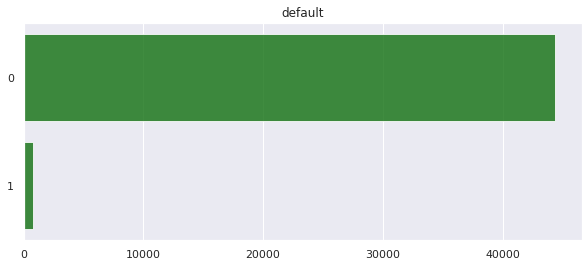

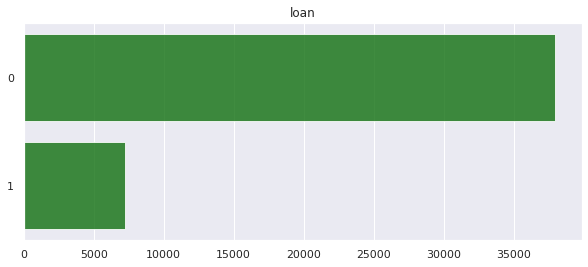

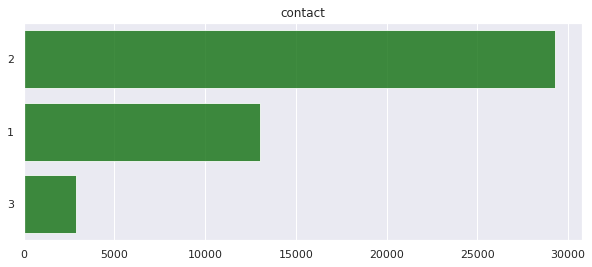

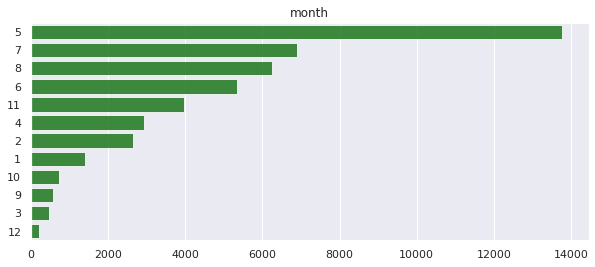

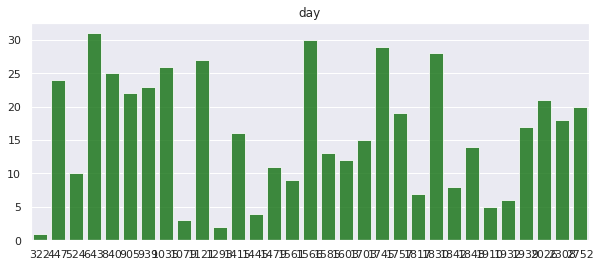

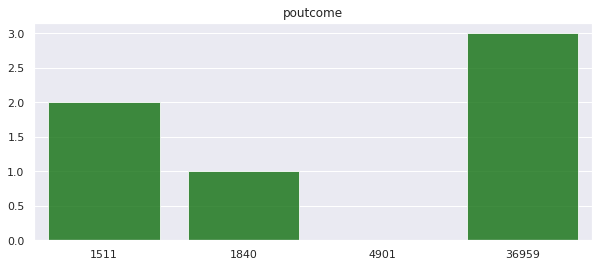

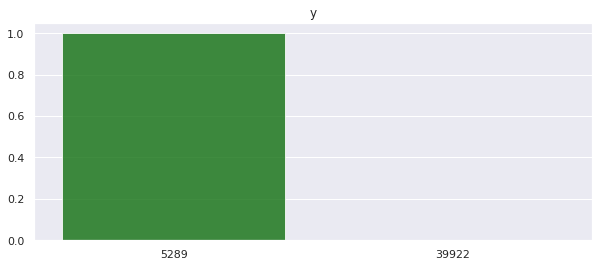

In [ ]:
dep_var = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day', 'poutcome','y']
for col in dep_var:
    plt.figure(figsize=(10,4))
    sns.barplot(bank[col].value_counts().values, bank[col].value_counts().index,color ='green',alpha =0.8 )
    plt.title(col)

## **Relation between numerical features**

Text(0.5, 1.0, 'Relation between numerical features')

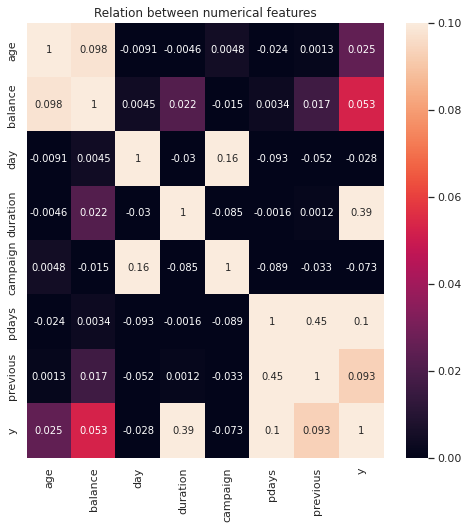

In [ ]:
bank.y= bank.y.map({'no':0, 'yes':1}).astype('uint8')
corr= bank.corr()
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, ax=ax, annot=True,vmin=0, vmax=0.1)
plt.title("Relation between numerical features")

There is no variable highly correlated to y

## **Removing outlier using z score**

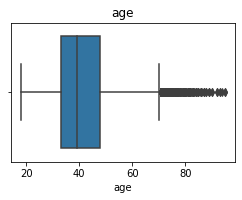

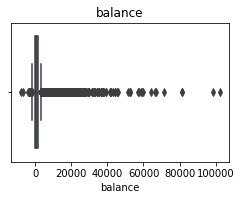

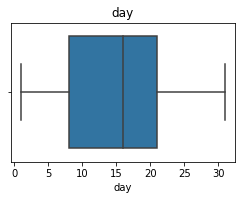

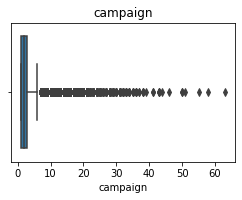

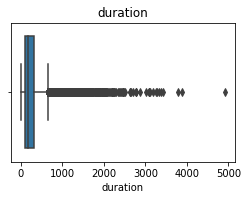

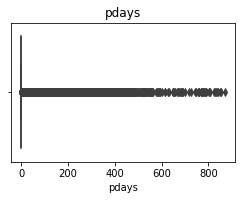

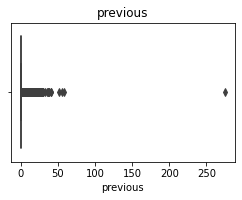

In [ ]:
col=bank[['age','balance','day','campaign','duration','pdays','previous']]
for i in col:
  n=1
  plt.figure(figsize=(10,10))
  plt.subplot(4,3,n)
  sns.boxplot(bank[i])
  plt.title(i)
  plt.tight_layout()
  n=n+1

In [ ]:
b = np.abs(stats.zscore(bank[['age','balance','duration','campaign','pdays','previous']]))
print(b)
bank=bank[(b<3).all(axis=1)]
bank.shape

            age   balance  duration  campaign     pdays  previous
0      1.606965  0.256419  0.011016  0.569351  0.411453  0.251940
1      0.288529  0.437895  0.416127  0.569351  0.411453  0.251940
2      0.747384  0.446762  0.707361  0.569351  0.411453  0.251940
3      0.571051  0.047205  0.645231  0.569351  0.411453  0.251940
4      0.747384  0.447091  0.233620  0.569351  0.411453  0.251940
...         ...       ...       ...       ...       ...       ...
45206  0.947747  0.176460  2.791329  0.076230  0.411453  0.251940
45207  2.831227  0.120447  0.768224  0.246560  0.411453  0.251940
45208  2.925401  1.429593  3.373797  0.721811  1.436189  1.050473
45209  1.512791  0.228024  0.970146  0.399020  0.411453  0.251940
45210  0.370689  0.528364  0.399328  0.246560  1.476138  4.523577

[45211 rows x 6 columns]


(40209, 17)

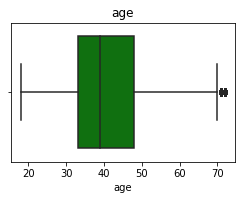

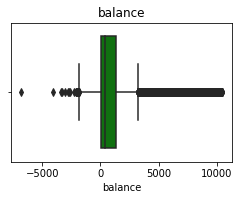

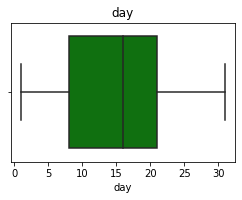

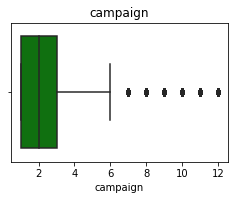

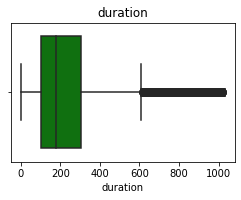

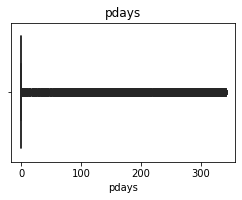

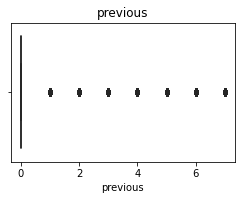

In [ ]:
co_variable=bank[['age','balance','day','campaign','duration','pdays','previous']]
for i in co_variable:
  n=1
  plt.figure(figsize=(10,10))
  plt.subplot(4,3,n)
  sns.boxplot(bank[i],color="g")
  plt.title(i)
  plt.tight_layout()
  n=n+1

changing categorical variable to numerical variable

In [ ]:
bank['marital']=bank['marital'].replace(['married', 'single', 'divorced'],['1','2','3'])
bank[['default','housing','loan']]=bank[['default','housing','loan']].replace(['yes','no'],['1','0'])
bank['month']=bank['month'].replace(['jan','feb','mar','apr','may','jun','jul', 'aug','sep','oct','nov','dec'],['1','2','3','4','5','6','7','8','9','10','11','12'])
bank['contact']=bank['contact'].replace(['unknown', 'cellular', 'telephone'],['1','2','3'])
bank['job']=bank['job'].replace(['unknown'],['other'])
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,tertiary,0,2143,1,0,1,5,5,261,1,-1,0,unknown,0
1,44,technician,2,secondary,0,29,1,0,1,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,1,secondary,0,2,1,1,1,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,1,unknown,0,1506,1,0,1,5,5,92,1,-1,0,unknown,0
4,33,other,2,unknown,0,1,0,0,1,5,5,198,1,-1,0,unknown,0


In [ ]:
x=bank.drop(['y'],axis=1) 
y=bank['y']        
bank['y'].value_counts()

0    36155
1     4054
Name: y, dtype: int64

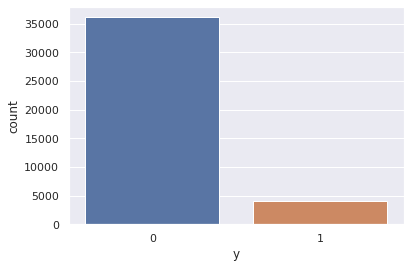

In [ ]:
sns.countplot(x='y',data=bank)

## **Random Over-Sampling**
Increasing the count of minor variable

Original dataset shape Counter({0: 36155, 1: 4054})
Resampled dataset shape Counter({0: 36155, 1: 36155})


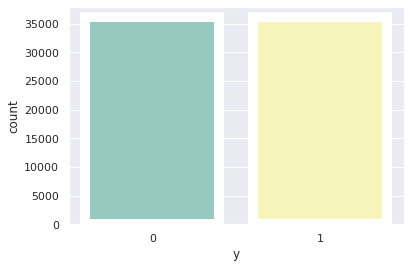

In [ ]:
sns.set_theme(style="darkgrid")
titanic = sns.load_dataset("titanic")

random_sample =  RandomOverSampler(random_state=42)
x_r,y_r=random_sample.fit_resample(x,y)

print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_r))

sns.countplot(y_r, linewidth=10,data=titanic,palette="Set3")

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x_r,y_r,test_size=.20,random_state=0)

ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.transform(xtest)

print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(7296, 16) (1825, 16) (7296,) (1825,)


In [ ]:
le=LabelEncoder()
bank['job']=le.fit_transform(bank['job'])
bank['education']=le.fit_transform(bank['education'])
bank['poutcome']=le.fit_transform(bank['poutcome'])

## **Random Undersampling using Nearmiss**

(7296, 16) (1825, 16) (7296,) (1825,)
Score: 0.9213984082558203
[[971  62]
 [ 81 711]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1052
           1       0.90      0.92      0.91       773

    accuracy                           0.92      1825
   macro avg       0.92      0.92      0.92      1825
weighted avg       0.92      0.92      0.92      1825



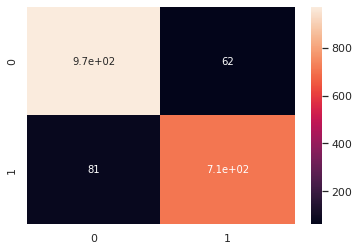

In [ ]:
from imblearn.under_sampling import NearMiss
nm=NearMiss(0.8)
x_r,y_r=nm.fit_resample(x,y)
xtrain,xtest,ytrain,ytest=train_test_split(x_r,y_r,test_size=.20,random_state=0)

ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.transform(xtest)

print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)
y_p = rf.predict(xtest)
a_rf=roc_auc_score(y_p,ytest)
acc_rf=accuracy_score(ytest,y_p)
r_rf=recall_score(ytest,y_p)
p_rf=precision_score(ytest,y_p)
f1_rf=f1_score(ytest,y_p)
print("Score:",a_rf)
cm=confusion_matrix(ytest,y_p)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_p,ytest))

## **SMOTETomek**

(49442, 16) (12361, 16) (49442,) (12361,)
Score: 0.9495715957700203
[[6753  275]
 [ 345 4988]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      7098
           1       0.94      0.95      0.94      5263

    accuracy                           0.95     12361
   macro avg       0.95      0.95      0.95     12361
weighted avg       0.95      0.95      0.95     12361



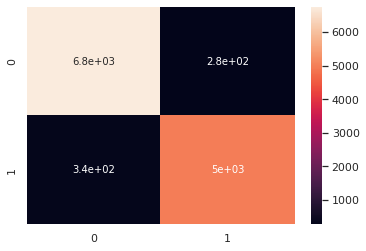

In [ ]:
sm=SMOTETomek(0.75)
x_r,y_r=sm.fit_resample(x,y)
xtrain,xtest,ytrain,ytest=train_test_split(x_r,y_r,test_size=.20,random_state=0)
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.transform(xtest)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)
r_f = RandomForestClassifier()
r_f.fit(xtrain, ytrain)
y_p = r_f.predict(xtest)
a_rf=roc_auc_score(y_p,ytest)
acc_rf=accuracy_score(ytest,y_p)
r_rf=recall_score(ytest,y_p)
p_rf=precision_score(ytest,y_p)
f1_rf=f1_score(ytest,y_p)
print("Score:",a_rf)
cm=confusion_matrix(ytest,y_p)
print(cm)
sns.heatmap(cm,annot=True)
print(classification_report(y_p,ytest))